In [1]:
import scvi
import numpy as np
import scanpy as sc
import scib

Global seed set to 0
During startup - Warning message:
Setting LC_CTYPE failed, using "C" 


In [2]:
rna = sc.read("../../../data/neurips-multiome/rna_hvg_batch.h5ad")
rna

AnnData object with n_obs × n_vars = 69249 × 4000
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'ATAC_gene_activity_var_names', 'Site_colors', 'batch_colors', 'cell_type_colors', 'dataset_id', 'genome', 'hvg', 'log1p', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'X_umap'
    layers: 'counts'

In [3]:
atac = sc.read("../../../data/neurips-multiome/atac_hvf.h5ad")
atac

AnnData object with n_obs × n_vars = 69249 × 40002
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay'
    var: 'feature_types', 'gene_id', 'n_cells', 'prop_shared_cells', 'variability_score'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'binary', 'counts', 'cpm', 'tf-idf', 'tf-idf-binary', 'tf-idf-counts'

In [4]:
rna.var['modality'] = 'Gene Expression'
atac.var['modality'] = 'Peaks'

In [5]:
rna.X = rna.layers['counts']
atac.X = atac.layers['binary']

In [6]:
# check that we are using raaw counts for rna and binary data for atac
np.max(rna.X), np.max(atac.X)

(7322.0, 1.0)

In [7]:
adata = rna.T.concatenate(atac.T).T
adata

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 69249 × 44002
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'cell_type_l2-1', 'cell_type_l1-1', 'cell_type_l3-1', 'assay-1'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'modality', 'n_cells', 'prop_shared_cells', 'variability_score', 'batch'
    layers: 'counts'

In [8]:
adata_mvi = scvi.data.organize_multiome_anndatas(adata)
adata_mvi

AnnData object with n_obs × n_vars = 69249 × 44002
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'cell_type_l2-1', 'cell_type_l1-1', 'cell_type_l3-1', 'assay-1', 'modality'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'modality', 'n_cells', 'prop_shared_cells', 'variability_score', 'batch'
    layers: 'counts'

In [9]:
adata_mvi.var["modality"]

KLHL17-0                     Gene Expression
ISG15-0                      Gene Expression
C1orf159-0                   Gene Expression
MMP23B-0                     Gene Expression
PRKCZ-0                      Gene Expression
                                  ...       
GL000195.1-32211-33062-1               Peaks
GL000219.1-39933-40839-1               Peaks
GL000219.1-42172-43054-1               Peaks
GL000219.1-99257-100160-1              Peaks
KI270713.1-21434-22336-1               Peaks
Name: modality, Length: 44002, dtype: object

In [10]:
adata_mvi = adata_mvi[:, adata_mvi.var["modality"].argsort()].copy()
adata_mvi.var

,feature_types,gene_id,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection,modality,n_cells,prop_shared_cells,variability_score,batch
KLHL17-0,GEX,ENSG00000187961,True,0.033889,1.947844,0.308808,5.0,False,Gene Expression,NaN,NaN,NaN,0
DRAM1-0,GEX,ENSG00000136048,True,0.254320,2.173353,0.234886,6.0,False,Gene Expression,NaN,NaN,NaN,0
PARPBP-0,GEX,ENSG00000185480,True,0.292809,2.181817,0.122131,6.0,False,Gene Expression,NaN,NaN,NaN,0
HELLPAR-0,GEX,ENSG00000281344,True,0.139631,2.084659,-0.116313,6.0,False,Gene Expression,NaN,NaN,NaN,0
C12orf42-0,GEX,ENSG00000179088,True,0.399944,2.505189,1.826948,13.0,True,Gene Expression,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr15-90019729-90020649-1,ATAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peaks,2643.0,0.038167,0.538167,1
chr15-90031123-90032003-1,ATAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peaks,3139.0,0.045329,0.545329,1
chr15-90034203-90034873-1,ATAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peaks,5285.0,0.076319,0.576319,1
chr15-89936116-89936939-1,ATAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peaks,2621.0,0.037849,0.537849,1


In [11]:
scvi.model.MULTIVI.setup_anndata(adata_mvi, 
                                 batch_key='modality',
                                 categorical_covariate_keys=['batch'])

In [12]:
mvi = scvi.model.MULTIVI(
    adata_mvi,
    n_genes=(adata_mvi.var['modality']=='Gene Expression').sum(),
    n_regions=(adata_mvi.var['modality']=='Peaks').sum(),
)

In [13]:
mvi.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:385: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/500:   0%|          | 0/500 [00:00<?, ?it/s]

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/scvi/module/_multivae.py:557: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2985.)
  x = torch.where(mask_expr.T, x_expr.T, x_acc.T).T


Epoch 387/500:  77%|███████▋  | 387/500 [2:11:21<38:21, 20.37s/it, loss=4.44e+03, v_num=1]  
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 9112.373. Signaling Trainer to stop.


In [14]:
adata_mvi.obsm["MultiVI_latent"] = mvi.get_latent_representation()

In [15]:
sc.pp.neighbors(adata_mvi, use_rep="MultiVI_latent")
sc.tl.umap(adata_mvi)

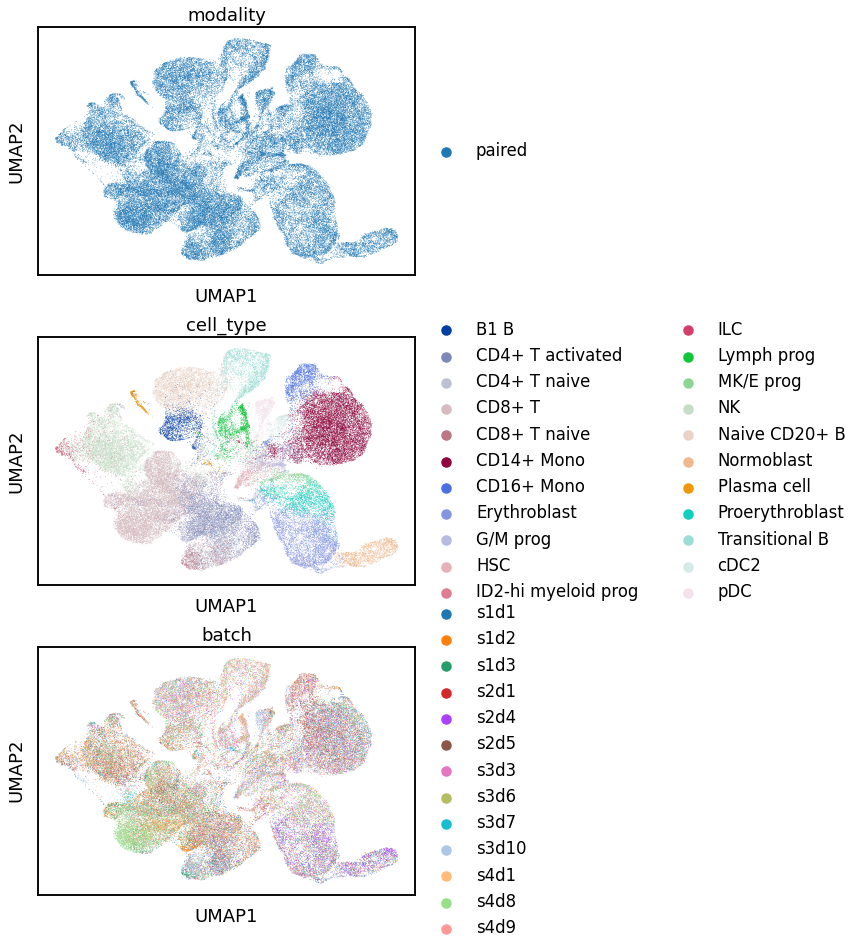

In [16]:
sc.pl.umap(adata_mvi, color=['modality', 'cell_type', 'batch'], ncols=1)

In [17]:
scib_anndata = sc.AnnData(adata_mvi.obsm['MultiVI_latent']).copy()
scib_anndata.obs = adata_mvi.obs.copy()
scib_anndata.uns['neighbors'] = adata_mvi.uns['neighbors'].copy()
scib_anndata.obsp['connectivities'] = adata_mvi.obsp['connectivities'].copy()
scib_anndata.obsp['distances'] = adata_mvi.obsp['distances'].copy()
scib_anndata.obsm['MultiVI_latent'] = adata_mvi.obsm['MultiVI_latent'].copy()

In [18]:
scib_anndata.write('neurips-multiome-multivi.h5ad')

In [19]:
metrics = scib.metrics.metrics(
    scib_anndata, 
    scib_anndata, 
    batch_key='batch', 
    label_key='cell_type', 
    embed='MultiVI_latent',
    ari_=True,
    nmi_=True,
    silhouette_=True,
    graph_conn_=True,
    isolated_labels_asw_=True,
)
metrics

NMI...
ARI...
Silhouette score...
Isolated labels ASW...
Graph connectivity...


,0
NMI_cluster/label,0.750965
ARI_cluster/label,0.657998
ASW_label,0.586747
ASW_label/batch,0.817665
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,0.510359
graph_conn,0.949493
kBET,NaN


In [20]:
metrics.to_csv('neurips_multiome_multivi.csv')